In [1]:
!ls ../input/specific_data

30866_train 30882_train 30893_train 35013_train 35015_train


In [2]:
import os
import re
import pandas as pd
import numpy as np
from glob import glob
import cv2
import json
from tqdm import tqdm

In [3]:
from glob import glob

for path in glob('../input/specific_data/*/*'):
    print(path.split('/')[-3:])
for path in glob('../input/general_data/*/*'):
    print(path.split('/')[-3:])

['specific_data', '30882_train', 'Schiller']
['specific_data', '30866_train', 'Konzilsprotokolle_C']
['specific_data', '35013_train', 'Patzig']
['specific_data', '35015_train', 'Schwerin']
['specific_data', '30893_train', 'Ricordi']
['general_data', '31031', 'semper']
['general_data', '30923', 'Janauschek']
['general_data', '35504', 'Barlach']
['general_data', '30887', 'Bentham']
['general_data', '30864', 'Konzilsprotokolle_A']
['general_data', '30890', 'McGahern']
['general_data', '30891', 'Christensson']
['general_data', '30865', 'Konzilsprotokolle_B']
['general_data', '30896', 'Topelius']
['general_data', '35051', 'StGallen']
['general_data', '30921', 'Munch']
['general_data', '30885', 'Ibsen']
['general_data', '31761', 'Bibeluebersetzer']
['general_data', '30883', 'Goethe']
['general_data', '30877', 'Kochbuch']
['general_data', '30870', 'OEAW']
['general_data', '30884', 'Peirce']


In [4]:
def get_specific_ids(number):
    specific_ids = {}
    for i in [1,4,16]:
        specific_ids[i] = set([line.strip() for line in open(f'../input/specific_data_train_list/{number}_train_{i}.lst').readlines() if line.strip()])
    
    result = {}
    result['valid'] = specific_ids[1]
    result['test'] = specific_ids[4].difference(specific_ids[1])
    result['train'] = specific_ids[16].difference(specific_ids[4].union(specific_ids[1]))
    
    return result

In [5]:
specific_ids = get_specific_ids('35015') # Schwerin

len(specific_ids['train']), len(specific_ids['valid']), len(specific_ids['test'])

(793, 68, 196)

In [6]:
specific_ids = get_specific_ids('30893') # Ricordi

len(specific_ids['train']), len(specific_ids['valid']), len(specific_ids['test'])

(295, 19, 69)

In [7]:
specific_ids = get_specific_ids('35013') # Patzig

len(specific_ids['train']), len(specific_ids['valid']), len(specific_ids['test'])

(485, 38, 118)

In [8]:
specific_ids = get_specific_ids('30866') # Konzil

len(specific_ids['train']), len(specific_ids['valid']), len(specific_ids['test'])

(353, 29, 87)

In [9]:
specific_ids = get_specific_ids('30882') # Schiller

len(specific_ids['train']), len(specific_ids['valid']), len(specific_ids['test'])

(244, 21, 63)

In [10]:
def get_image_mask(root_path, sample_id):
    image = cv2.imread(f'{root_path}/{sample_id}.jpg')

    image_mask = np.zeros(image.shape, dtype=np.uint8)

    coords = json.loads(','.join(open(f'{path_root}/{sample_id}.jpg.info').readlines()[-1].strip().split(';')))
    coords = np.array(
        coords
    )

    image_mask = cv2.fillPoly(image_mask, pts=[coords], color=(255,255,255))
    image = ((image.astype(np.float32)/255 * image_mask.astype(np.float32)/255)*255).astype(np.uint8)
    
    return image
    

# Ricordi

In [11]:
os.makedirs('prepared_datasets', exist_ok=True)
!rm -rf 'prepared_datasets/ricordi'
os.makedirs(f'prepared_datasets/ricordi', exist_ok=True)
os.makedirs(f'prepared_datasets/ricordi/images', exist_ok=True)

In [12]:
marking = []

specific_ids = get_specific_ids('30893')

path_root = '../input/specific_data/30893_train/Ricordi'

for stage in ['train', 'valid', 'test']:
    for sample_id in specific_ids[stage]:
        text = open(f'{path_root}/{sample_id}.txt').read().strip()
        marking.append({
            'sample_id': sample_id[:-4],
            'path': f'ricordi/images/{sample_id}',
            'stage': stage,
            'text': text,
        })
        
        image = get_image_mask(path_root, sample_id[:-4])
        cv2.imwrite(f'./prepared_datasets/ricordi/images/{sample_id}', image)

marking = pd.DataFrame(marking).set_index('sample_id')
marking['stage'].value_counts()

train    295
test      69
valid     19
Name: stage, dtype: int64

sample_id: 30893_0012_1067657_region_1482136336296_307_line_1482136532854_322
text: Ella abbia tutto il diritto di farlo, e se Ella entra
image_shape: (73, 869, 3)


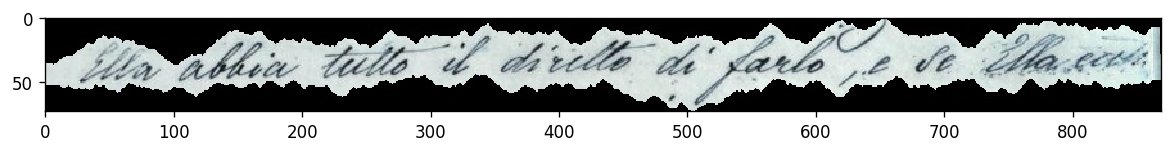

In [13]:
import matplotlib.pyplot as plt

idx = 67

sample = marking.iloc[idx]
text = sample['text']
image = cv2.imread(f'./prepared_datasets/{sample["path"]}')

print('sample_id:', sample.name)
print('text:', text)
print('image_shape:', image.shape)

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);

In [14]:
chars = set()
for text in marking['text']:
    chars.update(text)
    
''.join(sorted(list(chars)))

' !(),-./0123456789:;=ABCDEFGHILMNOPQRSTUV[]abcdefghilmnopqrstuvyz¬°–’'

In [15]:
marking.to_csv('./prepared_datasets/ricordi/marking.csv')

In [16]:
!cd ./prepared_datasets && tar -czvf ricordi.tar.gz ricordi > /dev/null

a ricordi
a ricordi/images
a ricordi/marking.csv
a ricordi/images/30893_0006_1067611_region_1482135742228_196_line_1482135806947_208.jpg
a ricordi/images/30893_0001_1067572_region_1482135290025_73_line_1482135335822_90.jpg
a ricordi/images/30893_0004_1067596_region_1482135545494_146_line_1482135575322_154.jpg
a ricordi/images/30893_0009_1067632_region_1482136008228_251_line_1482136061228_252.jpg
a ricordi/images/30893_0044_1067902_region_1482140356141_929_line_1482140403978_944.jpg
a ricordi/images/30893_0018_1067703_region_1482137271127_458_line_1482137282392_463.jpg
a ricordi/images/30893_0008_1067626_region_1482135931744_229_line_1482135979432_245.jpg
a ricordi/images/30893_0003_1067587_region_1482135450791_118_line_1482135472807_122.jpg
a ricordi/images/30893_0005_1067602_region_1482135643588_173_line_1482135674635_182.jpg
a ricordi/images/30893_0016_1067687_region_1482136920450_382_line_1482137012468_405.jpg
a ricordi/images/30893_0008_1067626_region_1482135931744_229_line_1482135

In [17]:
!du -sh ./prepared_datasets/ricordi.tar.gz

 10M	./prepared_datasets/ricordi.tar.gz


# Schwerin

In [18]:
os.makedirs('prepared_datasets', exist_ok=True)
!rm -rf 'prepared_datasets/schwerin'
os.makedirs(f'prepared_datasets/schwerin', exist_ok=True)
os.makedirs(f'prepared_datasets/schwerin/images', exist_ok=True)

In [19]:
marking = []

specific_ids = get_specific_ids('35015')

path_root = '../input/specific_data/35015_train/Schwerin'

for stage in ['train', 'valid', 'test']:
    for sample_id in specific_ids[stage]:
        text = open(f'{path_root}/{sample_id}.txt').read().strip()
        marking.append({
            'sample_id': sample_id[:-4],
            'path': f'schwerin/images/{sample_id}',
            'stage': stage,
            'text': text,
        })
        image = get_image_mask(path_root, sample_id[:-4])
        cv2.imwrite(f'./prepared_datasets/schwerin/images/{sample_id}', image)

marking = pd.DataFrame(marking).set_index('sample_id')
marking['stage'].value_counts()

train    793
test     196
valid     68
Name: stage, dtype: int64

sample_id: 35015_0012_1176437_r1_r1l30
text: Durch mich laszet uw’n strite sien
image_shape: (71, 491, 3)


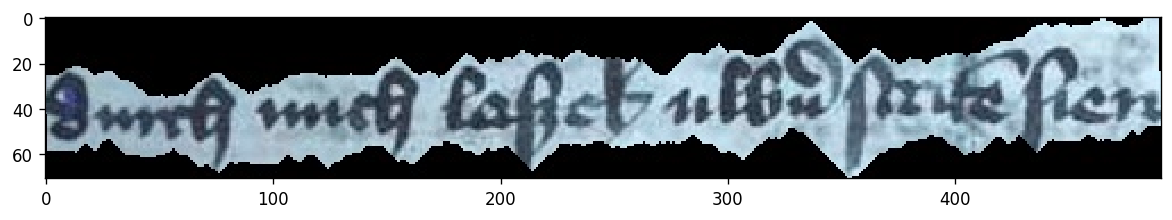

In [20]:
import matplotlib.pyplot as plt

idx = 777

sample = marking.iloc[idx]
text = sample['text']
image = cv2.imread(f'./prepared_datasets/{sample["path"]}')

print('sample_id:', sample.name)
print('text:', text)
print('image_shape:', image.shape)

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);

In [21]:
chars = set()
for text in marking['text']:
    chars.update(text)
    
''.join(sorted(list(chars)))

' ABCDEFGHJKLMNOPRSTUVWZabcdefghijklmnopqrstuvwxyz’'

In [22]:
marking.to_csv('./prepared_datasets/schwerin/marking.csv')

In [23]:
!cd ./prepared_datasets && tar -czvf schwerin.tar.gz schwerin > /dev/null

a schwerin
a schwerin/images
a schwerin/marking.csv
a schwerin/images/35015_0010_1176429_r3_r3l6.jpg
a schwerin/images/35015_0003_1176411_r3_r3l1.jpg
a schwerin/images/35015_0009_1176425_r4_r4l3.jpg
a schwerin/images/35015_0002_1176409_r2_r2l19.jpg
a schwerin/images/35015_0016_1176451_r5_r5l27.jpg
a schwerin/images/35015_0015_1176448_r2_r2l9.jpg
a schwerin/images/35015_0016_1176451_r5_r5l33.jpg
a schwerin/images/35015_0002_1176409_r2_r2l25.jpg
a schwerin/images/35015_0007_1176420_r5_r5l11.jpg
a schwerin/images/35015_0008_1176423_r5_r5l27.jpg
a schwerin/images/35015_0008_1176423_r5_r5l33.jpg
a schwerin/images/35015_0002_1176409_r2_r2l31.jpg
a schwerin/images/35015_0015_1176448_r2_r2l32.jpg
a schwerin/images/35015_0009_1176425_r6_r6l31.jpg
a schwerin/images/35015_0015_1176448_r2_r2l26.jpg
a schwerin/images/35015_0004_1176413_r5_r5l11.jpg
a schwerin/images/35015_0006_1176417_r6_r6l11.jpg
a schwerin/images/35015_0005_1176415_r2_r2l33.jpg
a schwerin/images/35015_0011_1176433_r5_r5l7.jpg
a s

In [24]:
!du -sh ./prepared_datasets/schwerin.tar.gz

 17M	./prepared_datasets/schwerin.tar.gz


# Patzig

In [25]:
os.makedirs('prepared_datasets', exist_ok=True)
!rm -rf 'prepared_datasets/patzig'
os.makedirs(f'prepared_datasets/patzig', exist_ok=True)
os.makedirs(f'prepared_datasets/patzig/images', exist_ok=True)

In [26]:
marking = []

specific_ids = get_specific_ids('35013')

path_root = '../input/specific_data/35013_train/Patzig'

for stage in ['train', 'valid', 'test']:
    for sample_id in specific_ids[stage]:
        text = open(f'{path_root}/{sample_id}.txt').read().strip()
        marking.append({
            'sample_id': sample_id[:-4],
            'path': f'patzig/images/{sample_id}',
            'stage': stage,
            'text': text,
        })
        image = get_image_mask(path_root, sample_id[:-4])
        cv2.imwrite(f'./prepared_datasets/patzig/images/{sample_id}', image)

marking = pd.DataFrame(marking).set_index('sample_id')
marking['stage'].value_counts()

train    485
test     118
valid     38
Name: stage, dtype: int64

sample_id: 35013_0004_1176443_r2_r2l18
text: hier die Griechen
image_shape: (52, 213, 3)


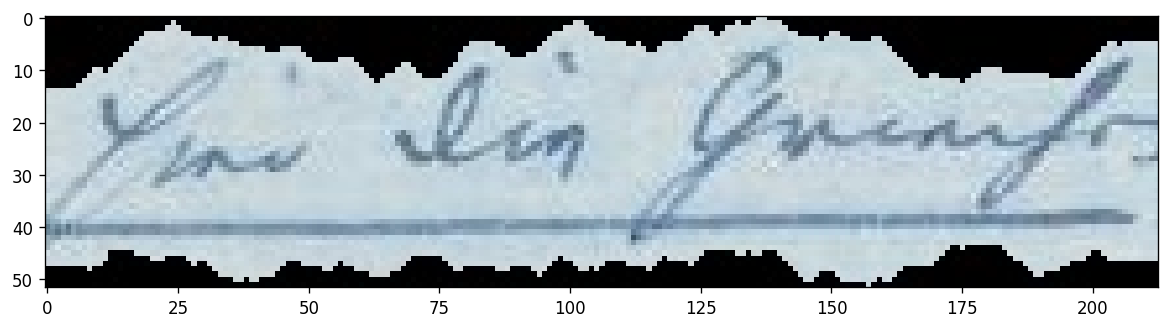

In [27]:
import matplotlib.pyplot as plt

idx = 555

sample = marking.iloc[idx]
text = sample['text']
image = cv2.imread(f'./prepared_datasets/{sample["path"]}')

print('sample_id:', sample.name)
print('text:', text)
print('image_shape:', image.shape)

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);

In [28]:
chars = set()
for text in marking['text']:
    chars.update(text)
    
''.join(sorted(list(chars)))

" ',-.0123456789:;ABCDEFGHJKLMNOPQRSTUVWZabcdefghijklmnopqrstuvwxyzß–"

In [29]:
marking.to_csv('./prepared_datasets/patzig/marking.csv')

In [30]:
!cd ./prepared_datasets && tar -czvf patzig.tar.gz patzig > /dev/null

a patzig
a patzig/images
a patzig/marking.csv
a patzig/images/35013_0012_1176467_r3_r3l8.jpg
a patzig/images/35013_0014_1176473_r2_r2l16.jpg
a patzig/images/35013_0009_1176458_r2_r2l2.jpg
a patzig/images/35013_0012_1176467_r3_r3l17.jpg
a patzig/images/35013_0010_1176463_r1_r1l34.jpg
a patzig/images/35013_0010_1176463_r1_r1l20.jpg
a patzig/images/35013_0016_1176480_r3_r3l10.jpg
a patzig/images/35013_0011_1176465_r3_r3l15.jpg
a patzig/images/35013_0011_1176465_r3_r3l29.jpg
a patzig/images/35013_0011_1176465_r3_r3l3.jpg
a patzig/images/35013_0005_1176445_r1_r1l6.jpg
a patzig/images/35013_0016_1176480_r1_r1l1.jpg
a patzig/images/35013_0005_1176445_r2_r2l21.jpg
a patzig/images/35013_0013_1176470_r1_r1l17.jpg
a patzig/images/35013_0006_1176447_r3_r3l28.jpg
a patzig/images/35013_0002_1176436_r2_r2l41.jpg
a patzig/images/35013_0006_1176447_r3_r3l14.jpg
a patzig/images/35013_0006_1176447_r3_r3l15.jpg
a patzig/images/35013_0002_1176436_r2_r2l40.jpg
a patzig/images/35013_0006_1176447_r3_r3l29.jpg

In [31]:
!du -sh ./prepared_datasets/patzig.tar.gz

 11M	./prepared_datasets/patzig.tar.gz


# Konzil

In [32]:
os.makedirs('prepared_datasets', exist_ok=True)
!rm -rf 'prepared_datasets/konzil'
os.makedirs(f'prepared_datasets/konzil', exist_ok=True)
os.makedirs(f'prepared_datasets/konzil/images', exist_ok=True)

In [33]:
marking = []

specific_ids = get_specific_ids('30866')

path_root = '../input/specific_data/30866_train/Konzilsprotokolle_C'

for stage in ['train', 'valid', 'test']:
    for sample_id in specific_ids[stage]:
        text = open(f'{path_root}/{sample_id}.txt').read().strip()
        marking.append({
            'sample_id': sample_id[:-4],
            'path': f'konzil/images/{sample_id}',
            'stage': stage,
            'text': text,
        })
        image = get_image_mask(path_root, sample_id[:-4])
        cv2.imwrite(f'./prepared_datasets/konzil/images/{sample_id}', image)

marking = pd.DataFrame(marking).set_index('sample_id')
marking['stage'].value_counts()

train    353
test      87
valid     29
Name: stage, dtype: int64

sample_id: 30866_0020_1063758_r1_r1l6
text: zum Capital zu schlagen.
image_shape: (284, 1070, 3)


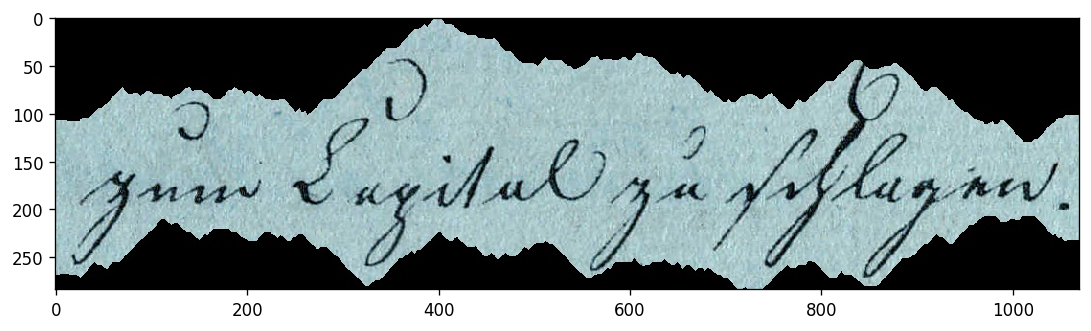

In [34]:
import matplotlib.pyplot as plt

idx = 112

sample = marking.iloc[idx]
text = sample['text']
image = cv2.imread(f'./prepared_datasets/{sample["path"]}')

print('sample_id:', sample.name)
print('text:', text)
print('image_shape:', image.shape)

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);

In [35]:
chars = set()
for text in marking['text']:
    chars.update(text)
    
''.join(sorted(list(chars)))

" ',-.0123456789:;ABCDEFGHIJKLMNOPQRSTUVWZabcdefghijklmnopqrstuvwxyz¬ß—"

In [36]:
marking.to_csv('./prepared_datasets/konzil/marking.csv')

In [37]:
!cd ./prepared_datasets && tar -czvf konzil.tar.gz konzil > /dev/null

a konzil
a konzil/images
a konzil/marking.csv
a konzil/images/30866_0018_1063751_r1_r1l27.jpg
a konzil/images/30866_0021_1063761_r3_r3l10.jpg
a konzil/images/30866_0013_1063725_r1_r1l9.jpg
a konzil/images/30866_0014_1063726_r1_r1l10.jpg
a konzil/images/30866_0021_1063761_r3_r3l9.jpg
a konzil/images/30866_0015_1063732_r1_r1l6.jpg
a konzil/images/30866_0012_1063719_r1_r1l6.jpg
a konzil/images/30866_0023_1063766_r1_r1l13.jpg
a konzil/images/30866_0017_1063745_r1_r1l23.jpg
a konzil/images/30866_0017_1063745_r1_r1l9.jpg
a konzil/images/30866_0016_1063738_r1_r1l20.jpg
a konzil/images/30866_0011_1063712_r1_r1l20.jpg
a konzil/images/30866_0018_1063751_r1_r1l1.jpg
a konzil/images/30866_0025_1063774_r1_r1l22.jpg
a konzil/images/30866_0025_1063774_r1_r1l23.jpg
a konzil/images/30866_0021_1063761_r2_line_1459175039408_47.jpg
a konzil/images/30866_0011_1063712_r1_r1l21.jpg
a konzil/images/30866_0016_1063738_r1_r1l21.jpg
a konzil/images/30866_0017_1063745_r1_r1l8.jpg
a konzil/images/30866_0023_106376

In [38]:
!du -sh ./prepared_datasets/konzil.tar.gz

 64M	./prepared_datasets/konzil.tar.gz


# Schiller

In [39]:
os.makedirs('prepared_datasets', exist_ok=True)
!rm -rf 'prepared_datasets/schiller'
os.makedirs(f'prepared_datasets/schiller', exist_ok=True)
os.makedirs(f'prepared_datasets/schiller/images', exist_ok=True)

In [40]:
marking = []

specific_ids = get_specific_ids('30882')

path_root = '../input/specific_data/30882_train/Schiller'

for stage in ['train', 'valid', 'test']:
    for sample_id in specific_ids[stage]:
        text = open(f'{path_root}/{sample_id}.txt').read().strip()
        marking.append({
            'sample_id': sample_id[:-4],
            'path': f'schiller/images/{sample_id}',
            'stage': stage,
            'text': text,
        })
        
        image = get_image_mask(path_root, sample_id[:-4])
        cv2.imwrite(f'./prepared_datasets/schiller/images/{sample_id}', image)

marking = pd.DataFrame(marking).set_index('sample_id')
marking['stage'].value_counts()

train    244
test      63
valid     21
Name: stage, dtype: int64

sample_id: 30882_0009_1065882_region_1440056963832_120_line_1440057116203_132
text: fliehen Sie ihn darum nicht.
image_shape: (121, 753, 3)


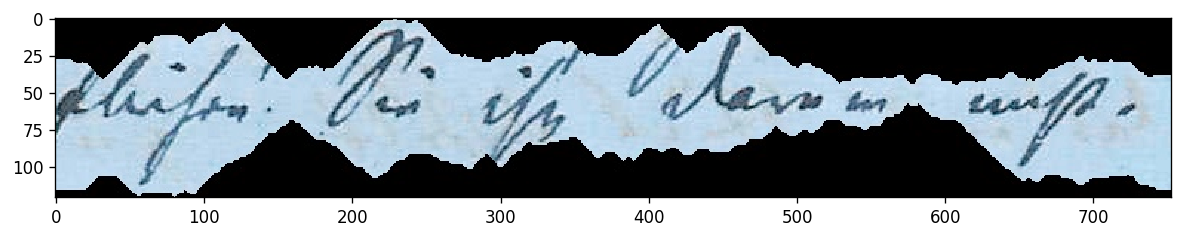

In [41]:
import matplotlib.pyplot as plt

idx = 110

sample = marking.iloc[idx]
text = sample['text']
image = cv2.imread(f'./prepared_datasets/{sample["path"]}')

print('sample_id:', sample.name)
print('text:', text)
print('image_shape:', image.shape)

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);

In [42]:
chars = set()
for text in marking['text']:
    chars.update(text)
    
''.join(sorted(list(chars)))

' ,.123459;ABCDEFGHIJKLMNOPRSTUVWZabcdefghijklmnopqrstuvwxyz¬ß—'

In [43]:
marking.to_csv('./prepared_datasets/schiller/marking.csv')

In [44]:
!cd ./prepared_datasets && tar -czvf schiller.tar.gz schiller > /dev/null

a schiller
a schiller/images
a schiller/marking.csv
a schiller/images/30882_0020_1065977_region_1440070844936_532_line_1440070929172_539.jpg
a schiller/images/30882_0008_1065873_region_1440056440703_97_line_1440056587505_104.jpg
a schiller/images/30882_0005_1065848_region_1439905076838_227_line_1439905312008_247.jpg
a schiller/images/30882_0012_1065907_region_1440059588187_281_line_1440060406716_292.jpg
a schiller/images/30882_0015_1065932_region_1440062727661_346_line_1440062792865_350.jpg
a schiller/images/30882_0006_1065855_region_1440055363687_52_line_1440055653990_65.jpg
a schiller/images/30882_0009_1065882_region_1440056969744_121_line_1440057251153_139.jpg
a schiller/images/30882_0016_1065942_region_1440062983415_368_line_1440064535646_378.jpg
a schiller/images/30882_0019_1065967_region_1440069044324_506_line_1440069977301_531.jpg
a schiller/images/30882_0014_1065924_region_1440060903115_325_line_1440061533665_335.jpg
a schiller/images/30882_0020_1065977_region_1440070850843_533

In [45]:
!du -sh ./prepared_datasets/schiller.tar.gz

 21M	./prepared_datasets/schiller.tar.gz
